In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import glob

In [3]:
glob.glob("C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr/*.csv")

['C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AAL_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AAP_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ABBV_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ABC_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ABT_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ACN_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ADBE_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ADI_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ADM_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ADP_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\ADSK_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individ

In [4]:
len(glob.glob("C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr/*.csv"))

505

In [5]:
company_list = [
   'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv',
   'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AMZN_data.csv',
   'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\GOOG_data.csv',
   'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\MSFT_data.csv'
    
]

In [6]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([current_df,all_data], ignore_index=True)

all_data.shape
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [8]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [9]:
tech_list = all_data['Name'].unique()
print(tech_list)

['MSFT' 'GOOG' 'AMZN' 'AAPL']


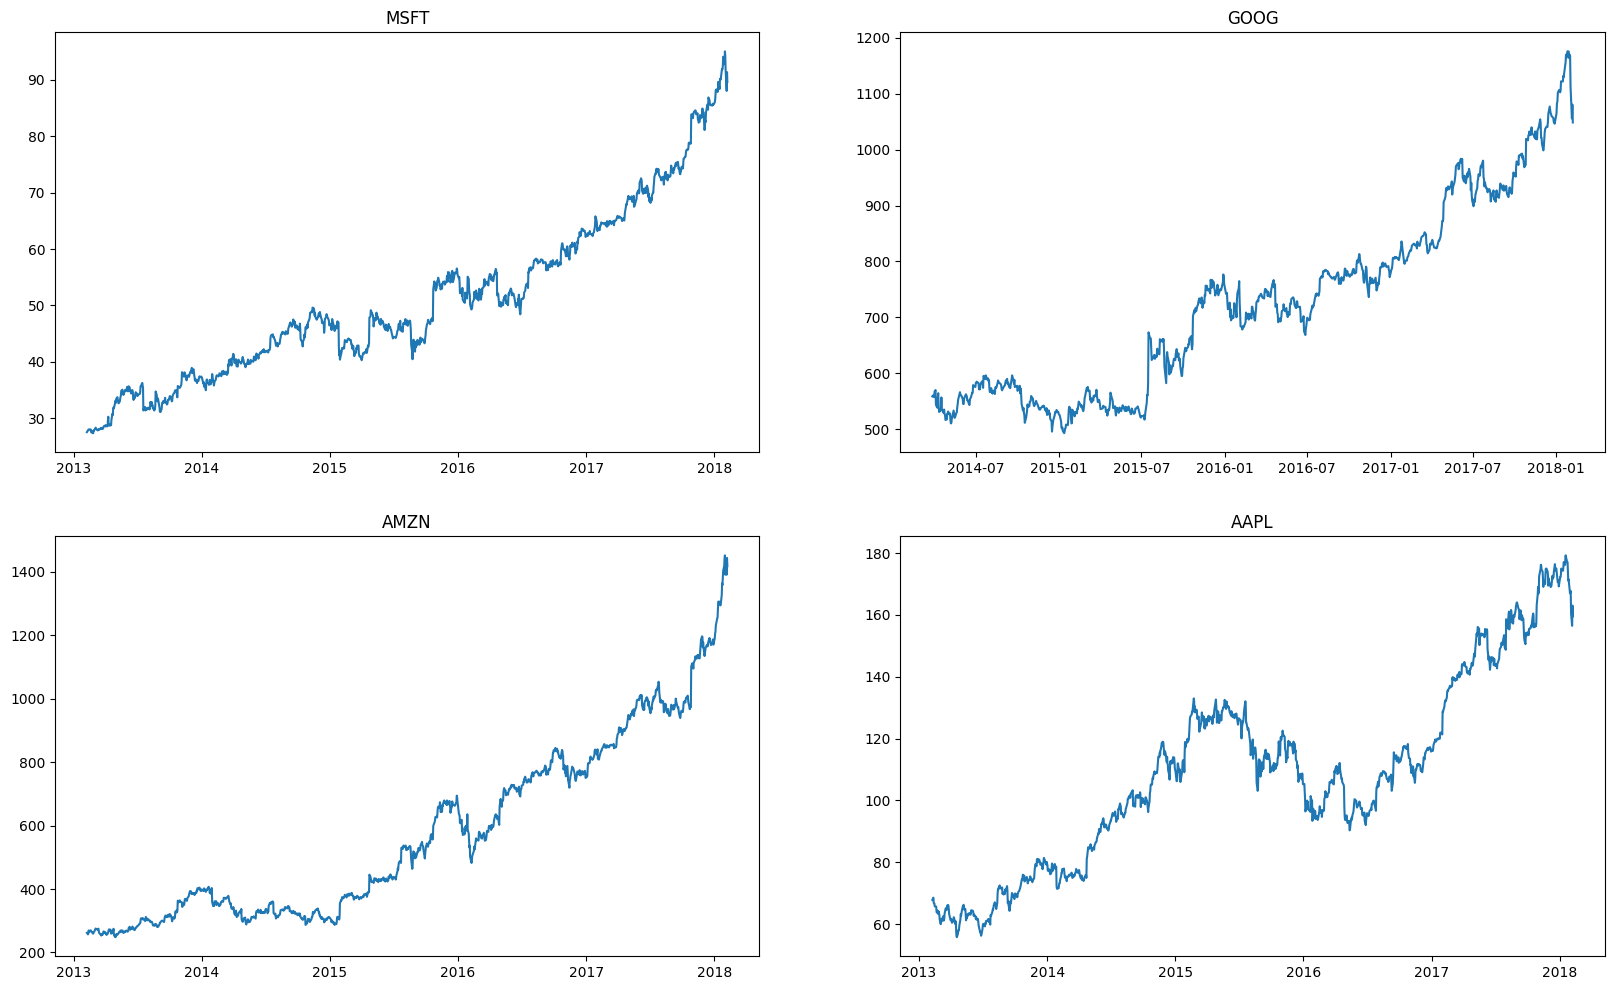

In [10]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list,1):
    plt.subplot(2,2, index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

In [11]:
all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [12]:
new_data = all_data.copy()

In [13]:
ma_day = [10,20,50]
for ma in ma_day:
    new_data['close'+str(ma)] = new_data['close'].rolling(ma).mean()

In [14]:
new_data

,date,open,high,low,close,volume,Name,close10,close20,close50
0,2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
1,2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2,2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
3,2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
4,2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640


In [15]:
new_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'close10',
       'close20', 'close50'],
      dtype='object')

In [16]:
new_data.set_index('date', inplace=True)
new_data.head()

,open,high,low,close,volume,Name,close10,close20,close50
date,,,,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,NaN,NaN,NaN


In [20]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close10', 'close20',
       'close50'],
      dtype='object')

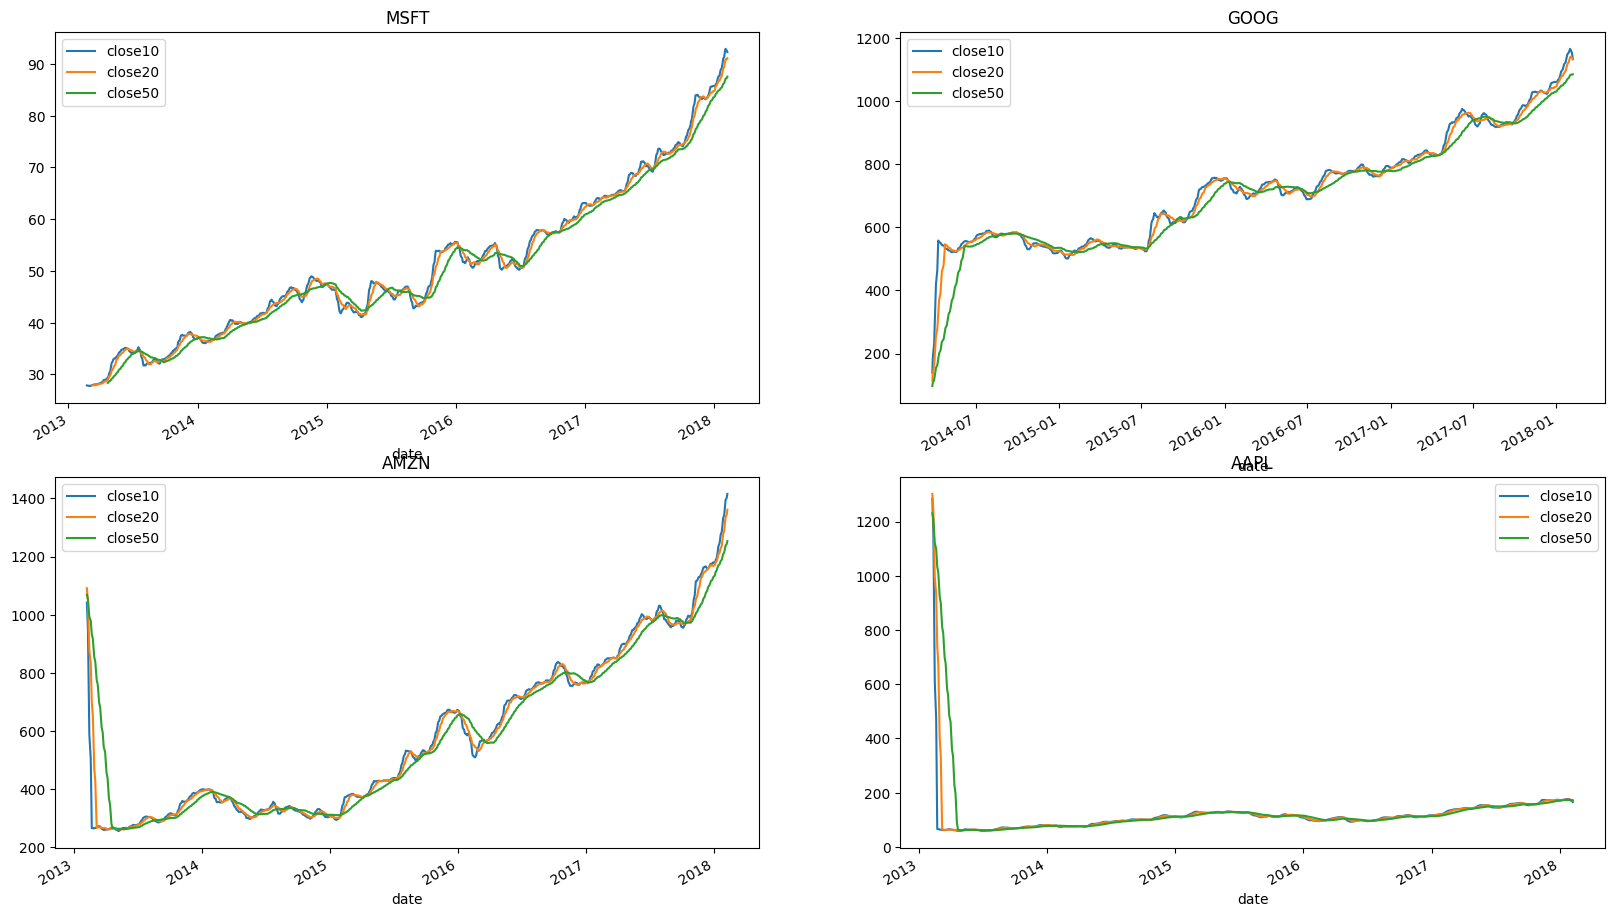

In [21]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list,1):
    plt.subplot(2,2, index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close10','close20','close50']].plot(ax=plt.gca())
    plt.title(company)

In [24]:
company_list

['C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AMZN_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\GOOG_data.csv',
 'C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\MSFT_data.csv']

In [25]:
apple = pd.read_csv('C:/Users/hangu/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv')

In [26]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [31]:
apple['Daily return(in %)'] = apple['close'].pct_change()*100

In [32]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [34]:
import plotly.express as px
px.line(apple, x='date', y = "Daily return(in %)", title = "Apple Daily Return")